<a href="https://colab.research.google.com/github/margiitazhr/TURF-Analysis_Statistika-Multivariat/blob/main/TURF_Analysis_Statistika_Multivariat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Nama  : Margita Zahra Ramandanisya
### NIM   : 11220940000008
### Kelas : Statistika Multivariat-B


**Analisis Kombinasi Kandungan Skincare Yang Dicari Konsumen Dengan Metode TURF**

# **PERMASALAHAN**
Seperti yang kita tau, banyak sekali kandungan aktif yang terdapat di dalam produk skincare. Oleh karena itu, kita perlu mengetahui kandungan apa saja yang sesuai dengan tipe jenis kulit kita. Melalui analisis statistik ini, saya mencoba mencari tahu, kombinasi kandungan skincare yang tepat sesuai dengan jenis kulit.



# **METODE**
TURF (Total Unduplicated Reach and Frequency) adalah metode analisis statistik yang digunakan untuk mengukur kombinasi elemen yang paling efektif menjangkau konsumen.

Kenapa metode ini cocok untuk studi kombinasi kandungan skincare?

*   Setiap konsumen biasanya menyukai lebih dari satu jenis kandungan skincare, dan ada banyak variasi kombinasi yang mungkin terjadi.
*   Kita ingin tahu kombinasi kandungan apa saja yang jika digabung, dapat menarik perhatian banyak orang.
*   produsen dapat mengetahui kandungan-kandungan apa saja yang jika digabungkan dalam satu produk dapat menarik minat konsumen sesuai jenis tipe kulit mereka.



# IMPORT MODUL

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GENERATE DATA RANDOM

In [16]:
np.random.seed(123)
# Daftar fitur skincare
skincare_features = [
    "Niacinamide", "Retinol", "Hyaluronic Acid", "Fragrance-free", "SPF",
    "Vegan/cruelty-free", "Ceramide", "Alcohol-free", "Glycerin", "AHA", "BHA", "Vitamin C", "Alpha Arbutin", "Adenosine", "Phantenol", "Benzoyl"
]

# Tipe kulit
skin_types = [
    "Normal", "Kering", "Berminyak", "Sensitif", "Kombinasi"
]

# Jumlah responden
num_respondents = 600

# Generate data dasar
data_skincare = {
    "Id": np.arange(1, num_respondents + 1),
    "Usia": np.random.randint(17, 35, num_respondents),
    "Tipe_Kulit": np.random.choice(skin_types, num_respondents)
}

# Tambahkan semua fitur dengan nilai awal 0
for feature in skincare_features:
    data_skincare[feature] = [0] * num_respondents

# Ubah setiap responden memilih 1–10 kandungan skincare
for i in range(num_respondents):
    num_choices = np.random.randint(1, 11)  # antara 1–10
    chosen_features = np.random.choice(skincare_features, size=num_choices, replace=False)
    for feature in chosen_features:
        data_skincare[feature][i] = 1

# Buat DataFrame dan simpan ke file
df_skincare = pd.DataFrame(data_skincare)
df_skincare.to_csv("data_survey_skincare_650.csv", index=False)
df_skincare.to_excel("data_survey_skincare_650.xlsx", index=False)

# Tampilkan data
df_skincare


,Id,Usia,Tipe_Kulit,Niacinamide,Retinol,Hyaluronic Acid,Fragrance-free,SPF,Vegan/cruelty-free,Ceramide,Alcohol-free,Glycerin,AHA,BHA,Vitamin C,Alpha Arbutin,Adenosine,Phantenol,Benzoyl
0,1,30,Kombinasi,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2,19,Sensitif,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,1
2,3,19,Sensitif,1,0,1,1,1,1,0,1,1,0,0,1,0,1,0,1
3,4,23,Kering,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,34,Normal,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,34,Sensitif,0,1,1,0,1,1,1,0,1,1,0,1,0,0,1,0
596,597,30,Normal,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
597,598,24,Normal,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0
598,599,29,Normal,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


#VISUALISASI

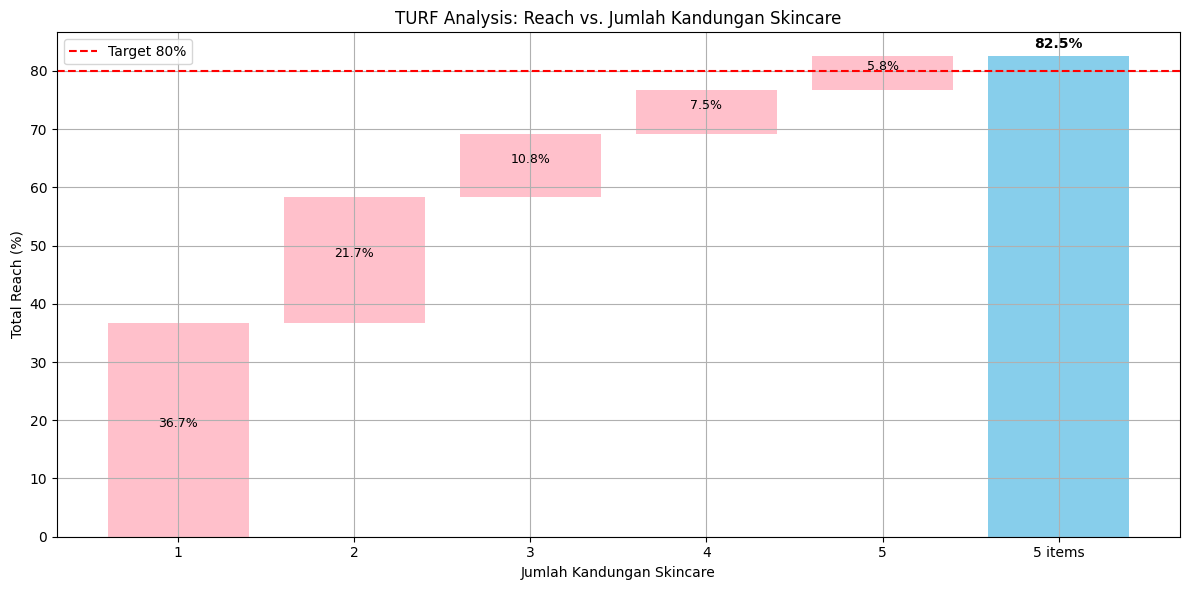

Untuk mencapai minimal 80%, cukup 5 kandungan skincare.

Kandungan skincare yang dipilih:
1. Ceramide
2. AHA
3. Glycerin
4. Niacinamide
5. Vegan/cruelty-free


In [17]:
# Target dan batas maksimal jumlah item yang dianalisis
Target_dalam_persen = 80  # Target reach dalam persen
maks_item = 10  # Maksimal jumlah kandungan skincare yang ingin ditampilkan

# Salin dataframe dari datamu
data_used = df_skincare.copy()
target_reach_pct = Target_dalam_persen / 100
target_reach = int(target_reach_pct * len(data_used))

# Tentukan kolom pertama fitur skincare
index_ = data_used.columns.get_loc("Niacinamide")

# Hitung reach setiap kandungan skincare
reach_per_item = data_used.iloc[:, index_:].sum().sort_values(ascending=False)

# TURF Analysis dengan pendekatan greedy + batas maksimal item
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))

    if len(new_reach) >= target_reach or len(selected_items) == maks_item:
        break

    current_reach = new_reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar(f"{i+1}", inc * 100, bottom=bottoms, color="pink")
    plt.text(i, bottoms + inc * 50, f"{inc * 100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100

# Garis target
plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')

# Tambahan bar terakhir (akumulatif total)
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="skyblue")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

# Label dan gaya
plt.xlabel("Jumlah Kandungan Skincare")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: Reach vs. Jumlah Kandungan Skincare")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output hasil
max_reach = reach_progress[-1]
if max_reach >= target_reach_pct:
    print(f"Untuk mencapai minimal {target_reach_pct * 100:.0f}%, cukup {len(selected_items)} kandungan skincare.")
else:
    print(f"Tidak dapat mencapai {target_reach_pct * 100:.0f}%. Maksimal hanya {max_reach * 100:.1f}% dengan {len(selected_items)} kandungan.")

print("\nKandungan skincare yang dipilih:")
for i, item in enumerate(selected_items):
    print(f"{i+1}. {item}")


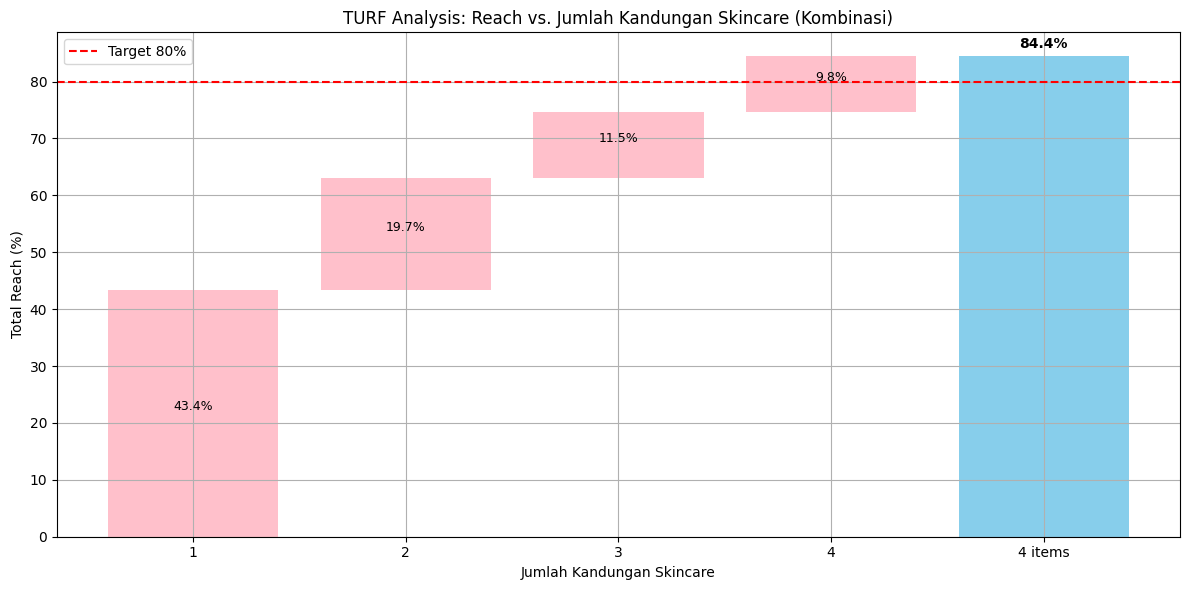

Untuk mencapai minimal 80%, perlu 4 kandungan skincare, untuk tipe kulit Kombinasi.

Kandungan skincare terpilih:
1. Benzoyl
2. Ceramide
3. Phantenol
4. AHA


In [28]:
# PARAMETER INPUT (#@param)
data = "data_survey_skincare_650.xlsx"  # @param {type:"string"}
Tipe_Kulit = "Kombinasi"  # @param ["Normal", "Kering", "Berminyak", "Sensitif", "Kombinasi"]
Target_dalam_persen = 80  # @param {type:"slider", min:10, max:100, step:5}

# LOAD DATA
df = pd.read_excel(data)
data_used = df[df["Tipe_Kulit"] == Tipe_Kulit].copy()

if len(data_used) == 0:
    raise SystemExit(f"Data kosong untuk tipe kulit '{Tipe_Kulit}'! Program dihentikan.")

# SETUP TARGET
target_reach_pct = Target_dalam_persen / 100
target_reach = int(target_reach_pct * len(data_used))

# HITUNG FREKUENSI SETIAP KANDUNGAN
index_ = data_used.columns.get_loc("Niacinamide")  # awal kolom kandungan skincare
skincare_cols = data_used.columns[index_:]
reach_per_item = data_used[skincare_cols].sum().sort_values(ascending=False)

# GREEDY ALGORITHM UNTUK MENENTUKAN KANDUNGAN TERPILIH
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))

    if len(new_reach) >= target_reach:
        break

    current_reach = new_reach

# HITUNG INCREMENTAL REACH
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i - 1] for i in range(1, len(reach_progress))]

# GRAFIK BERTINGKAT
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar(f"{i+1}", inc * 100, bottom=bottoms, color="pink")
    plt.text(i, bottoms + inc * 50, f"{inc * 100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100

plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')

plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="skyblue")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Jumlah Kandungan Skincare")
plt.ylabel("Total Reach (%)")
plt.title(f"TURF Analysis: Reach vs. Jumlah Kandungan Skincare ({Tipe_Kulit})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# OUTPUT KESIMPULAN
max_reach = reach_progress[-1]
if max_reach >= target_reach_pct:
    print(f"Untuk mencapai minimal {Target_dalam_persen}%, perlu {len(selected_items)} kandungan skincare, untuk tipe kulit {Tipe_Kulit}.")
else:
    print(f"Tidak dapat mencapai {Target_dalam_persen}%.\nHanya {max_reach * 100:.1f}% tercapai dengan {len(selected_items)} kandungan.")

print("\nKandungan skincare terpilih:")
for i, item in enumerate(selected_items):
    print(f"{i+1}. {item}")

# **HASIL INTERPRETASI**
Dapat dilihat hasil analisis ini menunjukkan bahwa hanya dengan memilih 5 kandungan skincare, target jangkauan 80% sudah dapat terpenuhi. Hal ini menunjukkan bahwa tidak semua kandungan perlu digunakan. Kandungan yang paling dominan dalam menjangkau konsumen adalah
1. Ceramide
2. AHA
3. Glycerin
4. Niacinamide
5. Vegan/cruelty-free

Kombinasi lima kandungan teratas berhasil menjangkau 83.5% konsumen, melebihi target yang ditetapkan.







*  Kombinasi yang dominan menjangkau  **Kulit Normal** adalah **Ceramide, Fragrance-Free, SPF, Vegan/cruelty-free**. Kombinasi diantaranya mencapai lebih dari 80% pada kelompok ini.

*   Kombinasi yang dominan untuk jenis **Kulit Kering** adalah **Alcohol-Free, Retinol, Niacinamide, Adenosine, Vegan/cruelty-free**. Kombinasi diantaranya mencapai lebih dari 80% pada kelompok ini.

*   Kombinasi yang dominan untuk jenis  **Kulit Berminyak** adalah **Alpha Arbutin, Niacinamide, Vegan/cruelty-free, AHA**. Kombinasi diantaranya mencapai lebih dari 80% pada kelompok ini.

*   Kombinasi yang dominan untuk jenis  **Kulit Sensitif** adalah **Niacinamide, Hyaluronic Acid, Glycerin, SPF, Andenosine**. Kombinasi diantaranya mencapai lebih dari 80% pada kelompok ini.

*   Kombinasi yang dominan untuk jenis  **Kulit Kombinasi** adalah **Benzoyl, Ceramide, Phanteonl, AHA**. Kombinasi diantaranya mencapai lebih dari 80% pada kelompok ini.





